In [148]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [17]:
print(os.getcwd())
print(os.listdir())

/projects/b1139/FE_fpx1364/FE-2023-examples
['Untitled.ipynb', 'run_example_inputs.py', 'README.fr.md', 'extract_weather.py', 'run_example_burnin_IP.py', 'spatial_plotter.Rmd', 'run_example.py', 'idmtools.log', 'manifest.py', 'inputs', 'hello_world.py', 'untitled', '.ipynb_checkpoints', 'analyzer_serialization.py', 'coding_assignment', 'analyzer_spatial.py', 'run_example_pickup_CM_withIP.py', 'run_example_burnin.py', 'run_example_calibration.py', 'prep', 'run_example_pickup.py', 'example_calibration_selection.py', 'analyzer_W1.py', 'experiments', 'run_example_sweeps.py', 'utils_slurm.py', 'analyzer_events.py', 'plot_InsetChart.Rmd', 'README.md', 'solution_scripts', 'run_example_pickup_CM.py', 'analyzer_W2.py', '.gitignore', 'analyzer_calibration.py', 'run_example_outputs.py', 'COMPS_log.log', '__pycache__', '.git', 'analyzer_IP.py', 'static', 'FE23-Examples.Rproj', 'plot_code_if_for_FE23_r.R', 'recreate_weather.py']


In [24]:
os.chdir("/projects/b1139/FE_fpx1364/FE-2023-examples/experiments/my_outputs/week4_IP_CM")
print(os.listdir())

['highaccess_PfPR_ClinicalIncidence.csv', 'lowaccess_PfPR_ClinicalIncidence.csv']


In [176]:
data_high = pd.read_csv("highaccess_PfPR_ClinicalIncidence.csv")
data_low = pd.read_csv("lowaccess_PfPR_ClinicalIncidence.csv")

In [137]:
data_low.head()

,month,PfPR,Cases,Severe cases,Pop,PfPR_2to10,annualeir,year,Run_Number
0,1,0.208157,1.685264,0.0,86.633333,0.448077,18.565402,2000,1
1,2,0.292482,2.000783,0.0,85.133333,0.509115,25.932816,2000,1
2,3,0.315248,1.300990,0.0,84.166667,0.499740,23.500174,2000,1
3,4,0.381496,2.730315,0.0,84.666667,0.556857,24.946973,2000,1
4,5,0.467618,2.110640,0.0,86.466667,0.576833,19.137418,2000,1


In [139]:
data_high["Run_Number"].unique()

array([1, 4, 2, 3, 0])

In [140]:
data_high_g = data_high.groupby(["month","year"], as_index=False).median()
data_low_g  = data_low.groupby(["month","year"],as_index=False).median()


In [141]:
data_high_g.head()

,month,year,PfPR,Cases,Severe cases,Pop,PfPR_2to10,annualeir,Run_Number
0,1,2000,0.542468,2.707715,0.0,95.366667,0.677390,29.593928,2
1,1,2001,0.269164,2.757555,0.0,92.533333,0.485294,25.298720,2
2,1,2002,0.250382,2.780196,0.0,95.833333,0.420611,21.480679,2
3,1,2003,0.244661,3.039790,0.0,92.966667,0.429604,23.094342,2
4,2,2000,0.617063,3.655624,0.0,95.300000,0.718976,43.142300,2


In [142]:
data_high_g["month_year"]=pd.to_datetime(data_high_g["year"].map(str) + "-" +
                                          data_high_g["month"].map(str) )

data_low_g["month_year"]=pd.to_datetime(data_low_g["year"].map(str) + "-" +
                                          data_low_g["month"].map(str) )
data_high_g.head()

,month,year,PfPR,Cases,Severe cases,Pop,PfPR_2to10,annualeir,Run_Number,month_year
0,1,2000,0.542468,2.707715,0.0,95.366667,0.677390,29.593928,2,2000-01-01
1,1,2001,0.269164,2.757555,0.0,92.533333,0.485294,25.298720,2,2001-01-01
2,1,2002,0.250382,2.780196,0.0,95.833333,0.420611,21.480679,2,2002-01-01
3,1,2003,0.244661,3.039790,0.0,92.966667,0.429604,23.094342,2,2003-01-01
4,2,2000,0.617063,3.655624,0.0,95.300000,0.718976,43.142300,2,2000-02-01


In [143]:
data_high_g.set_index(data_high_g["month_year"], inplace=True)
data_low_g.set_index(data_low_g["month_year"], inplace=True)
data_high_g.sort_index(inplace=True)
data_low_g.sort_index(inplace=True)

In [170]:
colour = ["teal","darkviolet", "tomato","steelblue","gold"]
lab=["2000-01","2000-06","2001-01","2001-06","2002-01","2002-06",
    "2003-01","2003-06","2004-01","2004-06"]

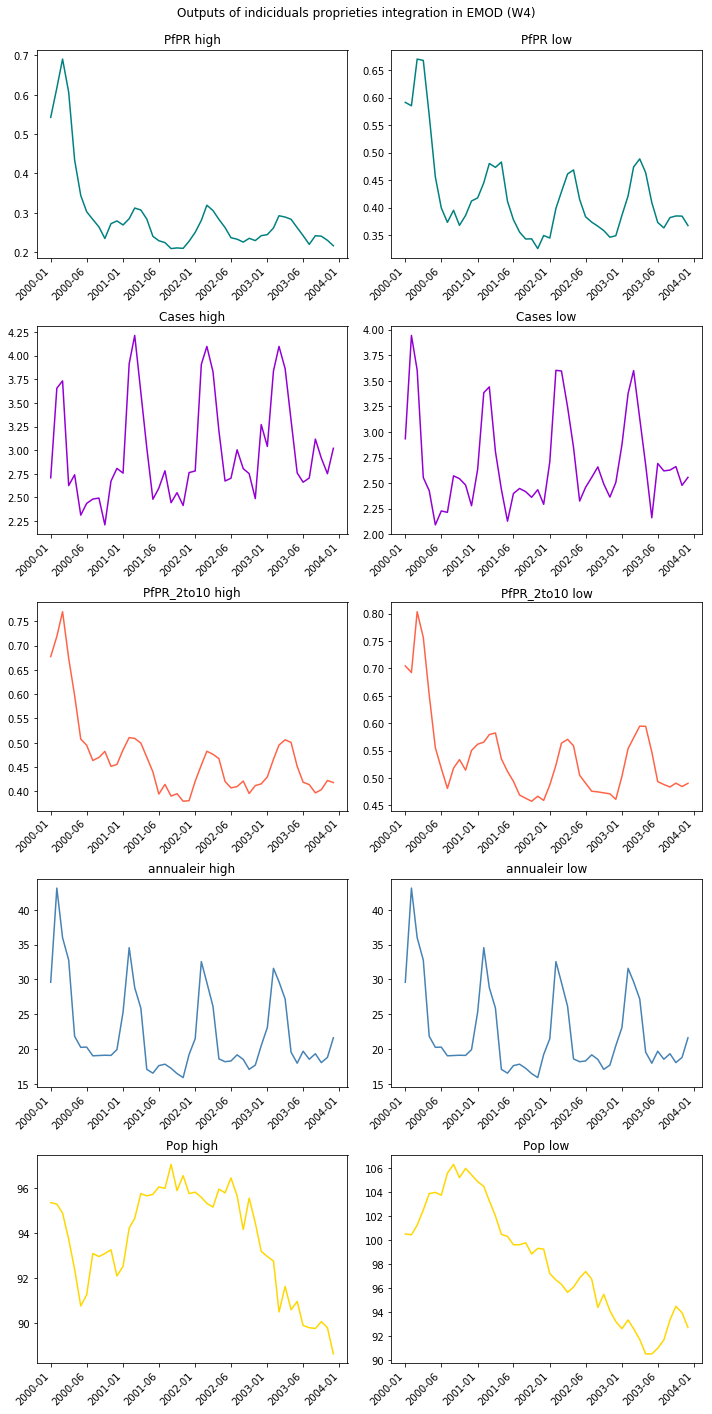

In [172]:
fig, axs = plt.subplots(5,2,figsize=(10,20))
fig.suptitle('Outputs of indiciduals proprieties integration in EMOD (W4)')
variable=["PfPR", "Cases","PfPR_2to10","annualeir", "Pop"]
i=0
for var in variable :
    axs[i,0].plot(data_high_g[var],c=colour[i])
    axs[i,0].set_title(var+" high")
    axs[i,0].set_xticklabels(labels=lab, rotation=45, ha='right')
    i=i+1
i=0
for var in variable :
    axs[i,1].plot(data_low_g[var],c=colour[i])
    axs[i,1].set_title(var+ " low")
    axs[i,1].set_xticklabels(labels=lab,rotation=45, ha='right')
    i=i+1

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [105]:
data_high_g.shape

(48, 10)

In [199]:
data_high["month_year"]=pd.to_datetime(data_high["year"].map(str) + "-" +
                                          data_high["month"].map(str) )

data_low["month_year"]=pd.to_datetime(data_low["year"].map(str) + "-" +
                                          data_low["month"].map(str) )


data_high.set_index(data_high["month_year"], inplace=True)
data_low.set_index(data_low["month_year"], inplace=True)
data_high.sort_index(inplace=True)
data_low.sort_index(inplace=True)

data_high.head()



,month,PfPR,Cases,Severe cases,Pop,PfPR_2to10,annualeir,year,Run_Number,month_year
month_year,,,,,,,,,,
2000-01-01,1,0.296749,1.658511,0.000000,95.366667,0.411781,18.565402,2000,1,2000-01-01
2000-01-01,1,0.296749,1.658511,0.000000,95.366667,0.411781,18.565402,2000,1,2000-01-01
2000-01-01,1,0.642957,3.563459,0.000000,95.600000,0.762205,46.254315,2000,0,2000-01-01
2000-01-01,1,0.516832,2.288779,0.120462,101.000000,0.671023,29.967492,2000,2,2000-01-01
2000-01-01,1,0.729777,3.817992,0.127266,95.600000,0.826659,45.040701,2000,0,2000-01-01


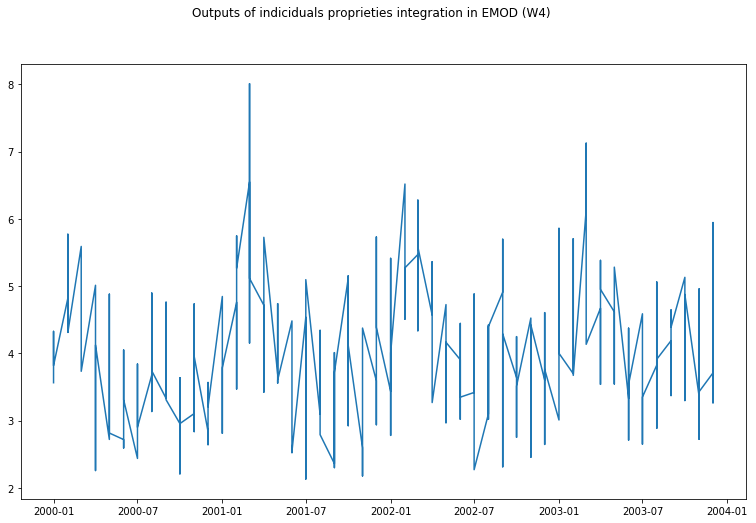

In [203]:
fig, axs = plt.subplots(figsize=(13,8))
fig.suptitle('Outputs of indiciduals proprieties integration in EMOD (W4)')
variable=["PfPR", "Cases","PfPR_2to10","annualeir", "Pop"]

gbh_data=data_high.groupby("Run_Number")

for name, group in gbh_data:
    plt.plot(group.month_year,group.Cases, label=name)
    break

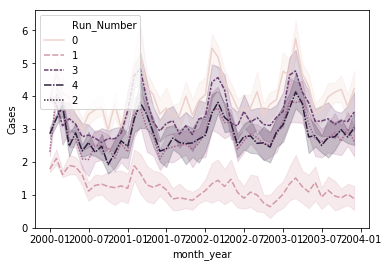

In [214]:
sn.lineplot(x="month_year", y="Cases",
             style="Run_Number", hue="Run_Number",
             data=data_high)